# Perspective Transform

In [1]:
# OpenCV2 is required.
# activate the RoboND env if you are using anaconda; it has all what you need.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
# read the example image

image = mpimg.imread('images/example_grid1.jpg')

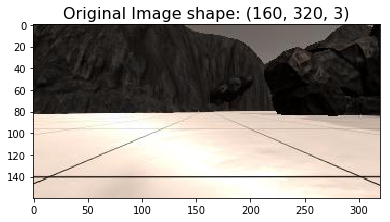

In [3]:
# Show the image and shape

f, (ax1) = plt.subplots(1, 1,figsize=(12, 3))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image shape: '+str(image.shape), fontsize=16)

plt.show()

In [4]:
# define function to transform the image

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

In [5]:
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter

hs_size = 10/2             # half the size of one square
b_ofst  = 6                # bottom offset to account for distance from rover edge to 1st camera visiable point
x_cntr  = image.shape[1]/2 # center of the image x axis
y_end   = image.shape[0]   # end of y or bottom of image

source      = np.float32([
                  [14, 140],      # Left Bottom
                  [301 ,140],     # Right Bottom
                  [200, 96],      # Right Top
                  [118, 96]       # Left Top
                  ])              # above data captured from simulator

destination = np.float32([
                  [x_cntr - hs_size, y_end - b_ofst],             # Left Bottom
                  [x_cntr + hs_size, y_end - b_ofst],             # Right Bottom
                  [x_cntr + hs_size, y_end - 2*hs_size - b_ofst], # Right Top
                  [x_cntr - hs_size, y_end - 2*hs_size - b_ofst], # Left Top
                  ])


In [6]:
# Wrap the image

warped = perspect_transform(image, source, destination)

In [7]:
# Draw Source and destination points on images (in blue) before plotting

cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 1)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 1); #; to supress output of this line

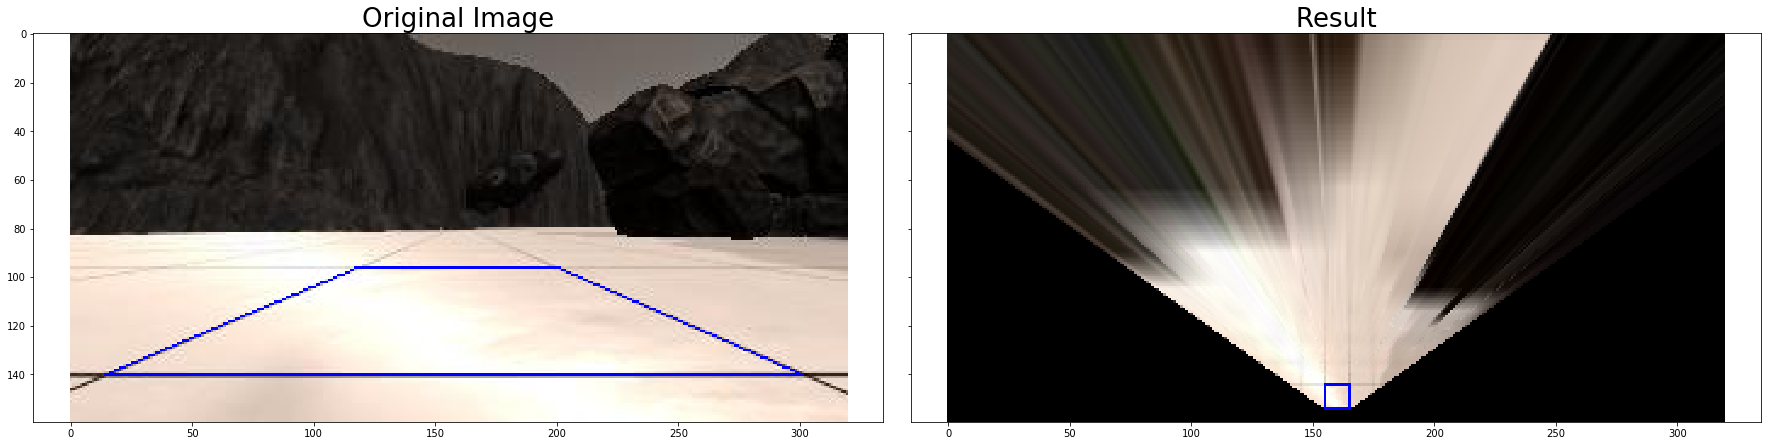

In [8]:
# Display the original image and binary

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=26)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=26)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()